In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9964285714285712
P-value: 2.4159793199703443e-15


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.398712549188019e-06


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9964285714285712
P-value: 2.4159793199703443e-15


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.399584351064136e-06


In [9]:
weights_unenc_ckks

[0.044400299160113114,
 0.08907569866849706,
 0.002196300168871637,
 -0.022708899149053656,
 -0.010228199768751127,
 0.05273189713676159,
 0.06684149868241049,
 0.0854884990874516,
 -0.013320396818121943,
 0.006164897061719894,
 0.11475389999022241,
 0.08989069810278191,
 0.03433569855995376,
 0.00010609861902257517,
 -0.0027893002513500256]

In [10]:
weights_unenc_sklearn

array([ 0.04605717,  0.09073026,  0.00220956, -0.0209023 , -0.00881558,
        0.05320643,  0.06714565,  0.08693222, -0.01303826,  0.00782812,
        0.11778823,  0.09342164,  0.03653631,  0.00274804, -0.0015673 ])

In [11]:
weights_unenc_paillier

[0.04439975970166476,
 0.0890745279037222,
 0.002196020951451983,
 -0.02270941347030561,
 -0.010227089277898666,
 0.05273206315129805,
 0.06684177112444688,
 0.085488805641594,
 -0.013321042052044239,
 0.006165344967848118,
 0.11475231910990477,
 0.0898905364830271,
 0.034334292202230325,
 0.00010755723868728517,
 -0.002790033569334254]

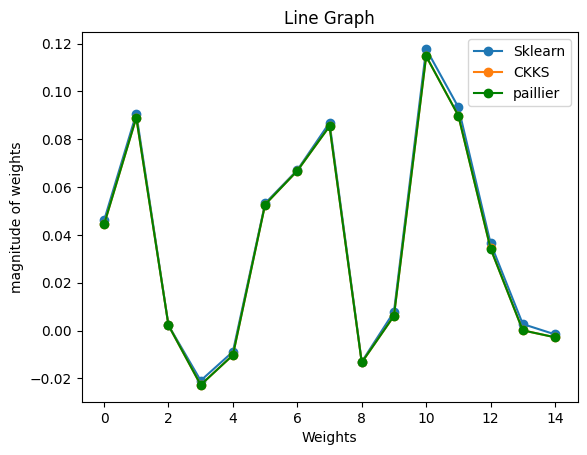

In [12]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

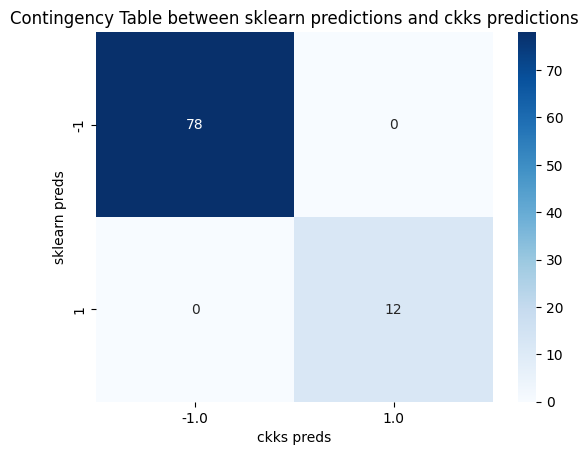

In [13]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

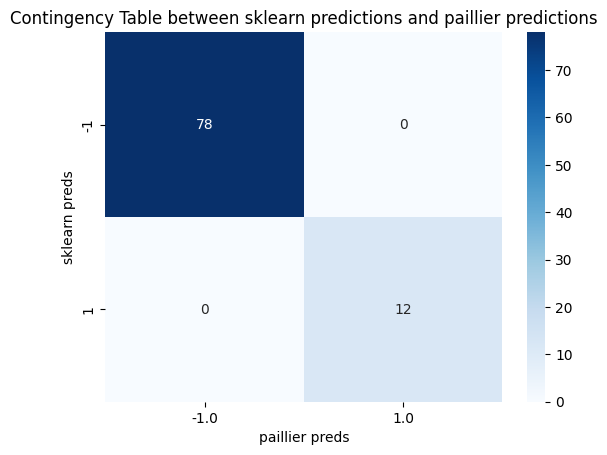

In [14]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

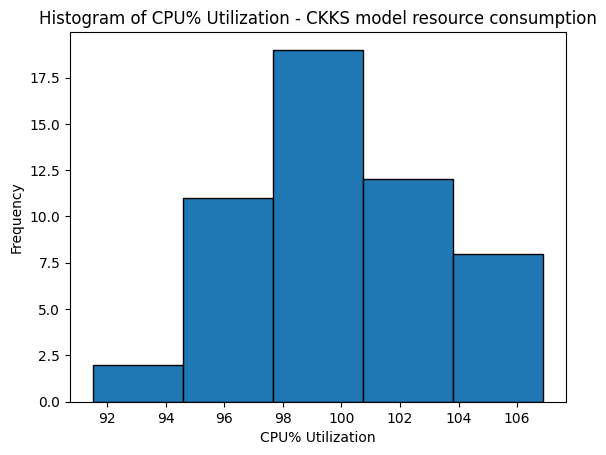

In [15]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.89999999999999
99.55


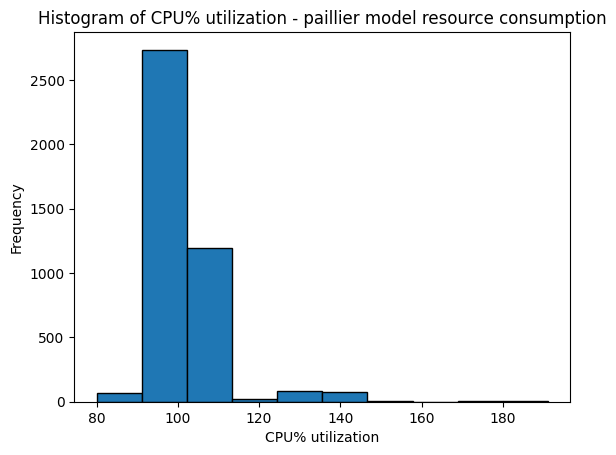

In [17]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [30]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

101.75823178016725
100.0


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

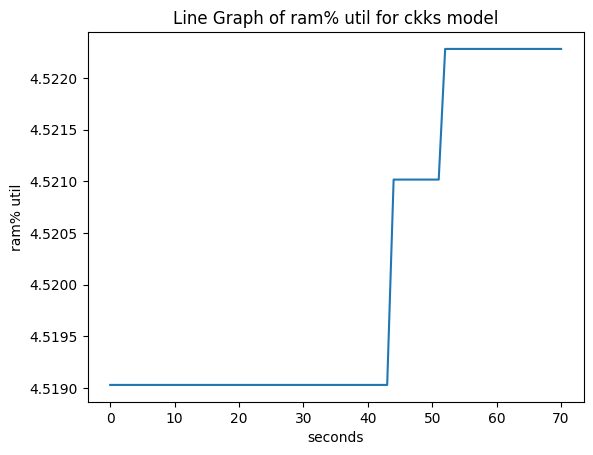

In [19]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [20]:
import numpy as np
np.mean(ram_usages_ckks)

4.5201246015011955

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

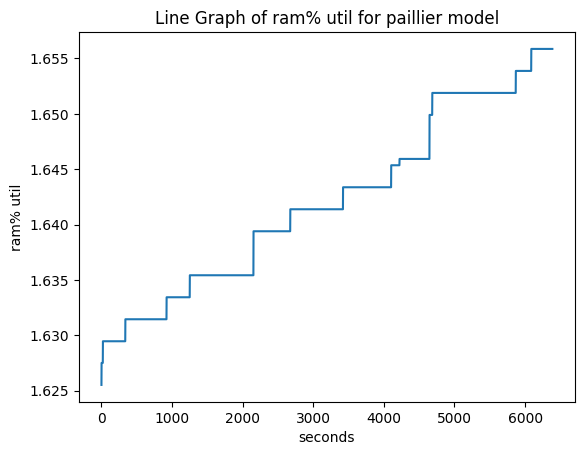

In [21]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [22]:
np.mean(ram_usages_paillier)

1.6421233618079867

In [23]:
np.mean(ram_usages_sklearn)

1.5982601645150971

In [24]:
train_time_ckks

57.35818600654602

In [25]:
train_time_paillier

5329.619764328003

In [26]:
testing_time_ckks

2.7558672428131104

In [27]:
testing_time_paillier

209.4090895652771

In [28]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.8, 0.8, 0.8)